In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
plt.rcParams["figure.dpi"] =150
ss =30
plt.rc('axes', titlesize=ss) #fontsize of the title
plt.rc('axes', labelsize=ss) #fontsize of the x and y labels
plt.rc('legend', fontsize=ss*2/3) #fontsize of the legend

In [3]:
ames = ["enron", "cnr-2000", "uk-2014-tpd"]
names = []
for a in ames:
    for suff in ["-exp", "-normal", "-uniform"]:
        names.append(a+suff)

In [4]:
names

['enron-exp',
 'enron-normal',
 'enron-uniform',
 'cnr-2000-exp',
 'cnr-2000-normal',
 'cnr-2000-uniform',
 'uk-2014-tpd-exp',
 'uk-2014-tpd-normal',
 'uk-2014-tpd-uniform']

In [5]:
totals = {"nuscan":[0.610408, 7.23677, 59.2501]+[0.59107, 16.197, 72.5104]+[9.96582, 1253.42, 2494.01], 
          "uscan":[0.566008, 13.4319, 63.8978]+[0.804968, 87029.6, 3990.34]+[48.2934, 172800, 172800]}

df = pd.DataFrame(totals, index=names)

In [6]:
df # (eta, epsilon, mu) = (0.8, 0.5, 2)

,nuscan,uscan
enron-exp,0.610408,0.566008
enron-normal,7.236770,13.431900
enron-uniform,59.250100,63.897800
cnr-2000-exp,0.591070,0.804968
cnr-2000-normal,16.197000,87029.600000
cnr-2000-uniform,72.510400,3990.340000
uk-2014-tpd-exp,9.965820,48.293400
uk-2014-tpd-normal,1253.420000,172800.000000
uk-2014-tpd-uniform,2494.010000,172800.000000


In [7]:
def make_bar_plot(plotdata, savename, ylab="Runtime (seconds)"):
    
    mpl.style.use("seaborn")
    ss =30
    plt.rc('axes', titlesize=ss) #fontsize of the title
    plt.rc('axes', labelsize=ss) #fontsize of the x and y labels
    plt.rc('legend', fontsize=ss/2) #fontsize of the legend
    plotdata.plot(kind="bar",figsize=(15, 8), colormap = "Paired")
    
    plt.semilogy()
    plt.xlabel("Data Sets")

    plt.ylabel(ylab)
    #to increase y ticks size
    plt.yticks(size=ss//1.5)

    #to increase x ticks 
    plt.xticks(size=ss//1.5, rotation=45)
    plt.tight_layout()
    plt.savefig(savename)
    plt.show()

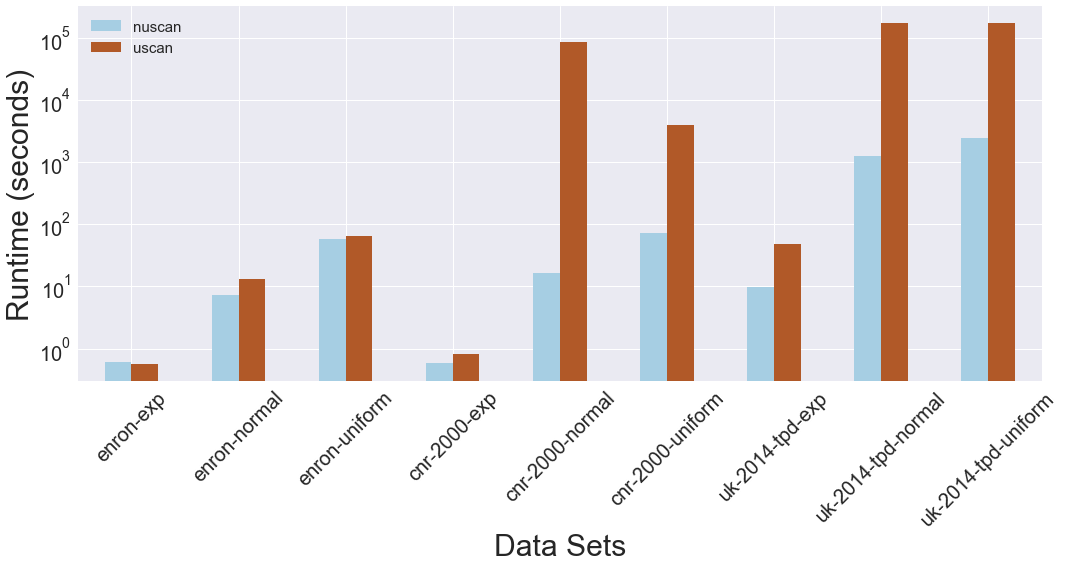

In [8]:
make_bar_plot(df, "../results/enron_cnr_uk/plots/bar_nuscan_uscan_compare_diff_distro.png")

In [9]:
def get_pandas(fn, path="/Users/josephhowie/Masters/NUSCAN/results/enron_cnr_uk/"):
    cols=["eta", "epsilon", "mu", "thres", "time", "cores", "clusters", "hubs", "outliers"]
    dfs = []
    for i in ["exp", "normal", "uniform"]:
        filename = f"{path}/{fn}/{fn}-{i}-runtime.nuscan"
        dfs.append(pd.read_csv(filename, names=cols, sep="\s+"))
    return dfs

def by_distro(i):
    return [enron[i], cnr[i], uk[i]]

In [10]:
enron = get_pandas("enron")
cnr = get_pandas("cnr-2000")
uk = get_pandas("uk-2014-tpd")

In [11]:
expo = by_distro(0)
normal = by_distro(1)
uniform = by_distro(2)

In [12]:
# enron[0].loc[(enron[0].epsilon==0.5) & (enron[0].mu==2)]
normal

[   eta  epsilon  mu  thres      time  cores  clusters  hubs  outliers
 0  0.2      0.5   2    100  20.71640   3680      1456   389     64917
 1  0.5      0.2   2    100  15.59530   4350      1527  2651     61939
 2  0.5      0.5   2    100  10.47540   1174       579    59     67748
 3  0.5      0.5   3    100  10.38940     52        51     1     68860
 4  0.5      0.5   5    100  10.34640      0         0     0     69017
 5  0.5      0.8   2    100  10.14640    464       232     0     68553
 6  0.8      0.5   2    100   0.59107      2         1     0     69015,
    eta  epsilon  mu  thres      time   cores  clusters   hubs  outliers
 0  0.2      0.5   2    100  5235.520   88738     23485  10369    225713
 1  0.5      0.2   2    100  4722.170  130561     28622  55590    138021
 2  0.5      0.5   2    100  2863.370   14399      7056   1806    308857
 3  0.5      0.5   3    100  2577.920     839       704    107    323258
 4  0.5      0.5   5    100  2594.740       2         2      0    

In [17]:
def build_df(eta, eps, mu, graphs, graph_list, label="", column="time"):
    dic = {}
    if len(label)<1:
        label = r"$\eta = {}$".format(eta)#, eps, mu)
    for i in range(len(graph_list)):
        graph = graphs[i]
        #print(graph_list[i])
        greep = graph.loc[graph.eta.eq(eta) & graph.epsilon.eq(eps) & graph.mu.eq(mu)][column]
        #print(greep)
        dic[graph_list[i]] = float(greep)
    dic = sorted(dic.items(), key=lambda x:x[1])
    times = [itm[1] for itm in dic]
    names = [itm[0] for itm in dic]
    df = pd.DataFrame({label:times}, index=names)
    return df

In [20]:
def get_new_df(graphs, names):
    totals = build_df(0.2, 0.5, 2, graphs, names)
    points = [(0.5, 0.5, 2), (0.8, 0.5, 2)]
    for eta, eps, mu in points:
    #     print(eta, eps, mu)
        totals = totals.join(build_df(eta, eps, mu, graphs, names))
    return totals

In [25]:
final = get_new_df(expo, ['enron-exp', 'cnr-2000-exp', 'uk-2014-tpd-exp'])

In [28]:
final = pd.concat([final, get_new_df(normal, ['enron-normal', 'cnr-2000-normal', 'uk-2014-tpd-normal'])])

In [30]:
final = pd.concat([final, get_new_df(uniform, ['enron-uniform', 'cnr-2000-uniform', 'uk-2014-tpd-uniform'])])

In [31]:
final

,$\eta = 0.2$,$\eta = 0.5$,$\eta = 0.8$
enron-exp,2.74698,0.774994,0.610408
cnr-2000-exp,271.65400,10.218200,7.236770
uk-2014-tpd-exp,462.58200,61.813700,59.250100
enron-normal,20.71640,10.475400,0.591070
cnr-2000-normal,5235.52000,2863.370000,16.197000
uk-2014-tpd-normal,12220.80000,7322.040000,72.510400
enron-uniform,36.37320,22.899200,9.965820
cnr-2000-uniform,5118.61000,3124.510000,1253.420000
uk-2014-tpd-uniform,9805.10000,6142.150000,2494.010000


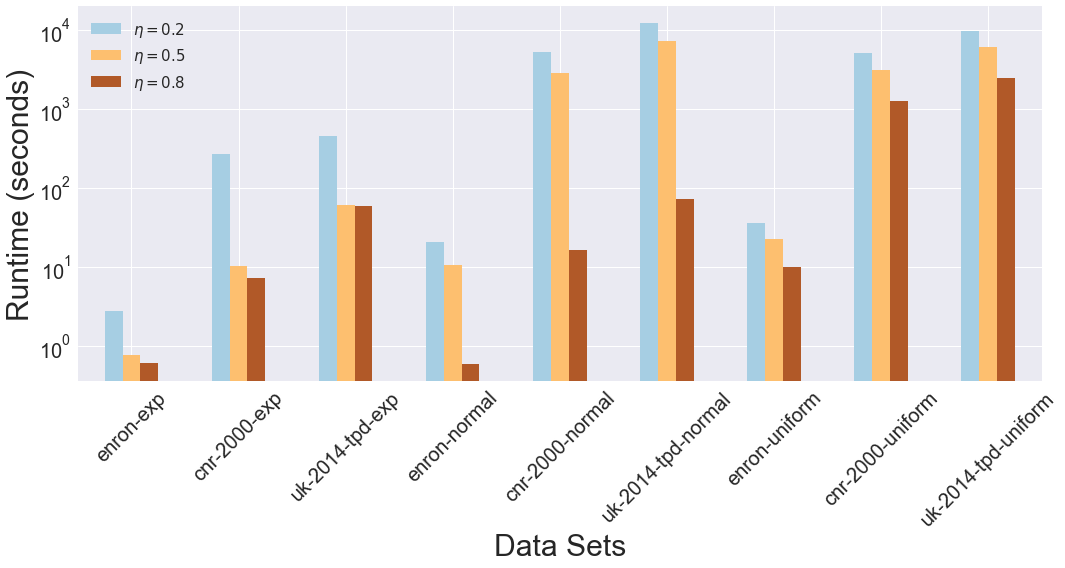

In [32]:
make_bar_plot(final, "../results/enron_cnr_uk/plots/bar_nuscan_diff_distro.png")